## Principal Component  Analysis (PCA)

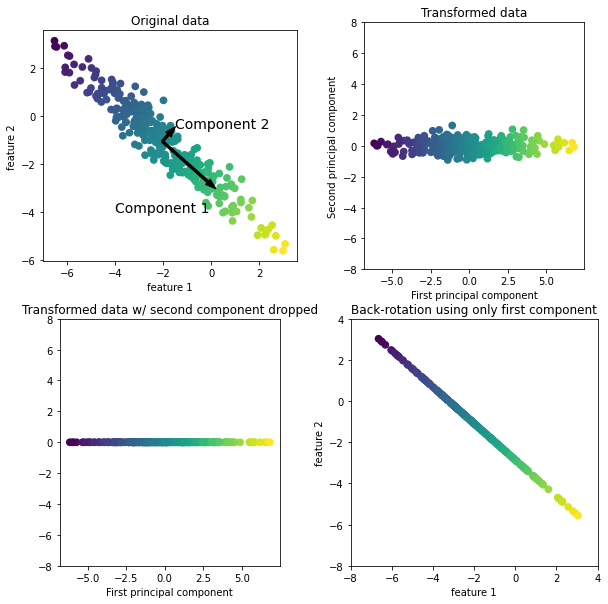

In [1]:
import mglearn

mglearn.plots.plot_pca_illustration()

### Applying PCA to the cancer dataset for visualization

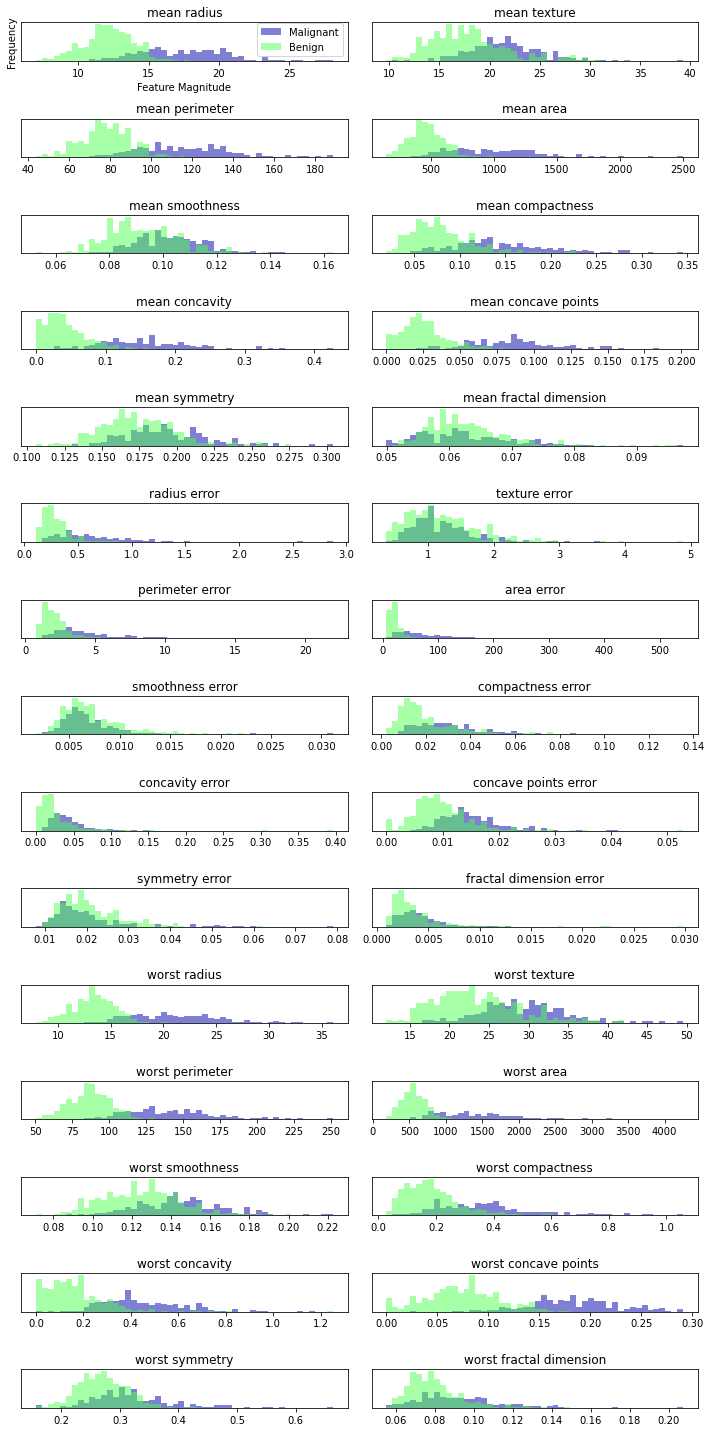

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature Magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc="best")
fig.tight_layout()

##### Here, for example the smoothness error is quite uninformative because the two histograms mostly overlap, while the feature "worst concave points" seems quite informative, because the histograms are quite disjoint

In [3]:
# Before using PCA, we always need to scale our data (Standard Scaler)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [4]:
from sklearn.decomposition import PCA

# Keep the first 2 principal components of the dataset
pca = PCA(n_components=2)

# Fit PCA model to the breast cancer data
pca.fit(X_scaled)

# transform data onto the first 2 principal components
X_pca = pca.transform(X_scaled)

print("Orginal shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Orginal shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second Principal Component')

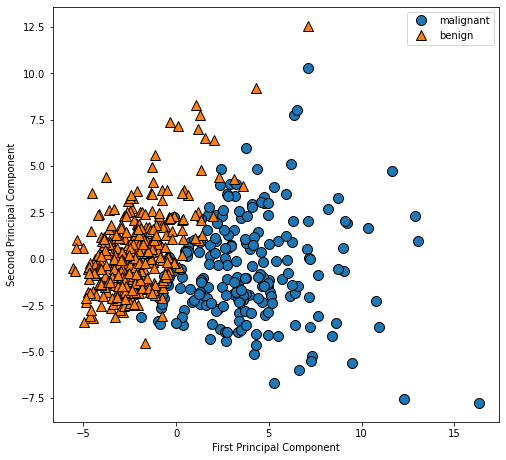

In [5]:
# Plot first vs. Second principal component, coloured by class

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

#### PCA is an unsupervised method and does use any class information when finding the rotation. It simply looks at the correlations of the data. We can see that the malignant data points are scattered more than benign, we could also see this through the instagram we plotted before.

#### Downside of PCA is that the 2 axes in the plot are often not easy to interpret.The PC are the combinations of the orginal features and these combinations are very complex

In [6]:
print("Principal Component Shape: {}".format(pca.components_.shape))

Principal Component Shape: (2, 30)


##### The number of rows are the principal components ordered by their importance. The number of columns are based on the features.

In [7]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal Components')

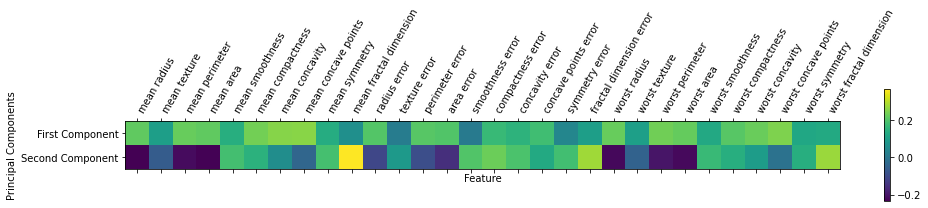

In [9]:
# Visualizing the PCA components using Heat Map

plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ["First Component", "Second Component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")